### 1. 使用决策树来判断特征的重要性

In [10]:
import joblib

In [12]:
_, data = joblib.load(filename="./all_data.lxh")

In [14]:
data

[array([[ 1.07985708, -1.05339234, -0.27066045, ..., -1.30988549,
          1.19617181, -0.47557594],
        [-1.79857225, -1.05339234, -1.81584743, ...,  0.13965207,
         -0.97666724, -0.9884621 ],
        [-1.42312495,  0.94931391,  1.27452653, ...,  0.65125357,
         -0.04426121, -0.35553876],
        ...,
        [ 1.70560258, -1.05339234, -1.04325394, ...,  0.09701861,
          0.83819449, -0.38100119],
        [ 0.57926067, -1.05339234,  0.50193304, ...,  2.31395842,
          0.26376578, -0.83205001],
        [ 0.82955888,  0.94931391, -1.04325394, ..., -1.18198512,
         -0.12751175,  1.96881763]]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([[-0.29678304, -1.05339234,  2.04712002, ..., -0.24404905,
          0.7924067 , -0.62471305],
        [-0.29678304,  0.94931391,  0.50193304, ..., -0.20141559,
         -0.72691562, -0.9884621 ],
        [-1.17282675,  0.94931391,  0.50193304, ...,  0.09701861,
         -0.93087944,  1.77603064],
        ...,
        [ 0.70440977,

In [16]:
X_train, y_train, X_test, y_test = data

In [18]:
X_train.shape

(8101, 19)

In [20]:
y_train.shape

(8101,)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc = DecisionTreeClassifier()

In [26]:
dtc.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [28]:
# 有一个属性，就是表示 特征的重要性：feature_importances_，数字越大越重要
dtc.feature_importances_.sort()

In [22]:
feature_importances = dtc.feature_importances_

In [24]:
import numpy as np
# 排序特征重要性（降序）
sorted_indices = np.argsort(feature_importances)[::-1]  # 获取 降序的特征索引
sorted_feature_importances = feature_importances[sorted_indices]

In [26]:
# 打印排序后的特征重要性
for index, importance in enumerate(sorted_feature_importances):
    print(f"Feature {index + 1}: Importance = {importance}")

Feature 1: Importance = 0.2924544778574079
Feature 2: Importance = 0.1919007318450222
Feature 3: Importance = 0.1375470555866088
Feature 4: Importance = 0.09650320754779879
Feature 5: Importance = 0.0783160494465354
Feature 6: Importance = 0.04654192347727185
Feature 7: Importance = 0.03280553384576188
Feature 8: Importance = 0.023886693495660524
Feature 9: Importance = 0.01898815202676916
Feature 10: Importance = 0.018699697051833306
Feature 11: Importance = 0.01601885811490221
Feature 12: Importance = 0.010790689480232634
Feature 13: Importance = 0.007346600528807828
Feature 14: Importance = 0.007162409864629087
Feature 15: Importance = 0.006281359081700409
Feature 16: Importance = 0.0060647159832427884
Feature 17: Importance = 0.004597153127334927
Feature 18: Importance = 0.0025422618354727705
Feature 19: Importance = 0.0015524298030075091


### 2，分类问题的评价
- 准确率 accuracy
  - 样本均衡时，可靠！
    - 不同类别的样本，数量上不会相差太多！
  - 样本不均衡时，特别是深度学习模型（梯度下降法）
    - 这个指标有欺骗性！
  - 预测对了的个数 / 总的测试个数
- 召回率 recall（查全率）：所有目标当中，找出来的概率。（上帝视角看人群有10个新冠阳性的， 算法查出来2个， 召回率 = 2 / 10）
    - 哪怕有0.01%的可能是阳性，也认为是阳性。
- 精准率 precision（查准率）,与recall成为制衡。 精准率 = 真正的阳性 / 声称的阳性。
    - 只有是100% 认为是阳性，才可以认为是声称的阳性，恰好跟recall相反
- f1-score（精准率和召回率的结合）
    - f1就是 recall  和 precision的 **调和平均**
    - 平均数 通常有这么三种：
        - 算数平均：$\Large \frac{a+b}{2}$
        - 几何平均：$\large \sqrt{ab}$
        - 调和平均：$\Large \frac{1}{S}=\frac{\frac{1}{a}+\frac{1}{b}}{2}$，$S$ 是平均值
          所以， $\Large S = \frac{2ab}{a+b}$
    - 即 $\Large f1 = \frac{2RP}{R+P} $，R=Recall，P=Precision

In [57]:
y_pred = dtc.predict(X=X_test)

In [59]:
(y_test == y_pred).mean()

0.9353405725567621

In [61]:
# 上面是自己动手计算的时候，但几乎所有框架里都有一个叫metrics（度量）的东西，这里已经都封装好了。
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [63]:
# 样本均衡问题，查看0类数据占比 是83%
(y_train == 0).mean()

0.8373040365386989

In [65]:
# 查看1类数据占比是16%，样本数据 不怎么均衡
(y_train == 1).mean()

0.16269596346130108

In [75]:
# 准确率
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
# 召回率
recall = recall_score(y_true=y_test, y_pred=y_pred, average=None)
# 精准率
precision = precision_score(y_true=y_test, y_pred=y_pred, average=None)
# f1
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=None)
# 打印
print(f'准确率：{acc}')
print(f'召回率：{recall}')
print(f'精准率：{precision}')
print(f'f1：{f1}')

准确率：0.9353405725567621
召回率：[0.96039604 0.7961165 ]
精准率：[0.96320093 0.78343949]
f1：[0.96179644 0.78972713]


### 3. 特征筛选(特征的降维)
- 干掉一部分不重要的特征
- 保留一部分重要的特征
- 剩下的特征还是原来的一部分
- 优化 = 降本增效 = 裁员

In [78]:
X_train.shape

(8101, 19)

In [86]:
dtc.feature_importances_

array([0.03280553, 0.00254226, 0.00459715, 0.00628136, 0.00716241,
       0.00606472, 0.00155243, 0.01079069, 0.09650321, 0.02388669,
       0.0186997 , 0.01898815, 0.19190073, 0.01601886, 0.04654192,
       0.13754706, 0.29245448, 0.07831605, 0.0073466 ])

In [149]:
"""
    抽取出 5 个最重要的特征，然后测试准确率
"""
import numpy as np
from sklearn.metrics import accuracy_score

feature_importances = dtc.feature_importances_

# 排序特征重要性（降序）
sorted_idxes_top5 = np.argsort(feature_importances)[::-1][:5]  # 获取 重要度前5的特征的索引

print(sorted_idxes_top5)

[16 12 15  8 17]


In [151]:
# 花式索引，把这5个特征抽取出来
X_train_top5 = X_train[:, sorted_idxes_top5]
X_test_top5 = X_test[:, sorted_idxes_top5]

In [153]:
# 构建模型
dtc_top5 = DecisionTreeClassifier()
# 训练模型
dtc_top5.fit(X=X_train_top5, y=y_train)
# 预测模型
y_pred_top5 = dtc_top5.predict(X=X_test_top5)
# 计算准确率
y_acc_top5 = accuracy_score(y_true=y_test, y_pred=y_pred_top5)

In [155]:
y_acc_top5

0.9348469891411648

In [185]:
# 发现 抽取5个最高重要度的进行评估结果跟之前准确率几乎一致，这应该是碰巧，  所以下面进行验证
# 验证的方法就是，不限定5，依次都取一遍，然后对比看取top几的时候准确率最高
import numpy as np
from sklearn.metrics import accuracy_score

# 构建模型
dtc_topN = DecisionTreeClassifier()

for num_features in range(1, 20, 1):
    feature_importances = dtc.feature_importances_
    
    # 排序特征重要性（降序）
    sorted_idxes_topN = np.argsort(feature_importances)[::-1][:num_features]  # 获取 重要度前 N 的特征的索引

    # 花式索引，把这5个特征抽取出来
    X_train_topN = X_train[:, sorted_idxes_topN]
    X_test_topN = X_test[:, sorted_idxes_topN]
    
    # 训练模型
    dtc_topN.fit(X=X_train_topN, y=y_train)
    # 预测模型
    y_pred_topN = dtc_topN.predict(X=X_test_topN)
    # 计算准确率
    y_acc_topN = accuracy_score(y_true=y_test, y_pred=y_pred_topN)

    print(num_features, "====", y_acc_topN)

1 ==== 0.866238894373149
2 ==== 0.8854886475814413
3 ==== 0.9052319842053307
4 ==== 0.9313919052319842
5 ==== 0.9353405725567621
6 ==== 0.9368213228035538
7 ==== 0.941263573543929
8 ==== 0.9383020730503455
9 ==== 0.9343534057255676
10 ==== 0.9318854886475815
11 ==== 0.9333662388943732
12 ==== 0.930898321816387
13 ==== 0.9353405725567621
14 ==== 0.937314906219151
15 ==== 0.9343534057255676
16 ==== 0.9353405725567621
17 ==== 0.932872655478776
18 ==== 0.9318854886475815
19 ==== 0.9318854886475815


### 4. 特征融合（也是一种特征的降维）
- 把所有特征中重要的成份抽出来
- 注入的几个新的特征中
- 新的特征不是原来的任何一部分
- 原地解散，根据实际需要，重新招人！
- PCA：主成分分析法  Principal component analysis

In [231]:
from sklearn.decomposition import PCA

In [233]:
# 初始化 PCA
pca = PCA(n_components=5)   # 降维到 5 维

In [235]:
pca.fit(X=X_train)  # pca是无监督，所以标签参数不用传值

PCA(n_components=5)

In [237]:
X_train_transformed = pca.transform(X=X_train)
X_test_transformed = pca.transform(X=X_test)

In [239]:
X_train_transformed.shape

(8101, 5)

In [241]:
X_test_transformed.shape

(2026, 5)

In [243]:
# 然后用决策树
dtc2 = DecisionTreeClassifier()

In [245]:
dtc2.fit(X=X_train_transformed, y=y_train)

DecisionTreeClassifier()

In [247]:
y_pred2 = dtc2.predict(X=X_test_transformed)

In [249]:
acc2 = (y_pred2 == y_test).mean()

In [251]:
acc2

0.8361303060217177

In [269]:
"""
    遍历寻优
"""
from sklearn.decomposition import PCA

for num_features in range(1, 20, 1):
    # 初始化 PCA
    pca = PCA(n_components=num_features)   # 降维到 5 维
    pca.fit(X=X_train)  # pca是无监督，所以标签参数不用传值
    X_train_transformed = pca.transform(X=X_train)
    X_test_transformed = pca.transform(X=X_test)
    dtc2 = DecisionTreeClassifier()
    dtc2.fit(X=X_train_transformed, y=y_train)
    y_pred2 = dtc2.predict(X=X_test_transformed)
    acc2 = (y_pred2 == y_test).mean()
    print(num_features, "====", acc2)

1 ==== 0.7408687068114511
2 ==== 0.7704837117472852
3 ==== 0.7902270483711747
4 ==== 0.8455083909180652
5 ==== 0.8420533070088845
6 ==== 0.8455083909180652
7 ==== 0.8538993089832182
8 ==== 0.8445212240868707
9 ==== 0.8509378084896347
10 ==== 0.8553800592300099
11 ==== 0.8519249753208292
12 ==== 0.8450148075024679
13 ==== 0.8672260612043435
14 ==== 0.8761105626850938
15 ==== 0.8756169792694966
16 ==== 0.8711747285291214
17 ==== 0.8692003948667325
18 ==== 0.8820335636722606
19 ==== 0.8830207305034551


### 5，特征分解
- FFT
- 上述的PCA降维，主要是通过svd分解来实现的

In [274]:
X_train.shape

(8101, 19)

In [276]:
import numpy as np

In [278]:
# 通过SVD分解，将看不懂的的矩阵信息转换，用S来控制
# U：左歧义，Vt：右歧义，S：歧义值
U, S, Vt = np.linalg.svd(a=X_train, full_matrices=False)

In [280]:
from matplotlib import pyplot as plt

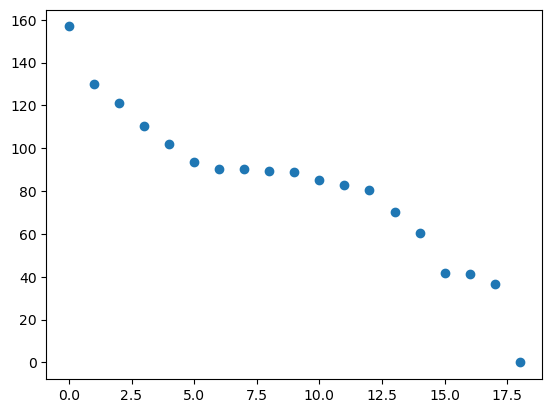

In [282]:
plt.scatter(range(len(S)), S)

In [284]:
from sklearn.datasets import load_breast_cancer

In [286]:
X, y = load_breast_cancer(return_X_y=True)

In [288]:
X.shape

(569, 30)

In [290]:
U1, S1, Vt1 = np.linalg.svd(a=X, full_matrices=False)

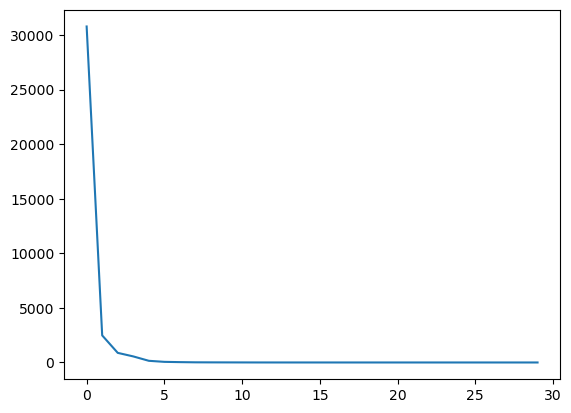

In [292]:
plt.plot(S1)